### PLOTAGEM DO GRÁFICO TERNÁRIO BASEADO NA CLASSIFICAÇÃO TEXTURAL DO MATERIAL DO LEITO POR PERCENTUAL DE AREIA DE FOLK (1954)
#### Fonte: Folk, R. L. The distinction between grain size and mineral composition in sedimentary-rock nomenclature. The Journal of Geology, Vol. 62, No. 4 (Jul., 1954), pp. 344-359
#### Autor: Marcelo Di Lello Jordão
#### Data: 19/11/25

In [82]:
# Biblioteca

import ternary
import matplotlib.pyplot as plt
import numpy as np

In [79]:
# Preparação das linhas que dividem o ternário em classes texturais

def rot_list(lst):
    return [[p[0], p[1], p[2]] for p in lst]

def linha_const(c):
    pts = []
    for s in np.linspace(0, 100 - c, 200):
        si = 100 - s - c
        pts.append([s, c, si])
    return pts

lista1 = [[33,0,67],[3.3,90.0,6.7]]
lista2 = [[67,0,33],[6.7,90.0,3.3]]

# Nome das regiões [Silte, Areia, Argila]
regiao_areias = [4,92,4]
regiao_siltes = [80,2,18]
regiao_argilas = [15,2,83]
regiao_lama = [50,2,48]
regiao_argilaArenosa = [15,12,73]
regiao_lamaArenosa = [45,12,43]
regiao_silteArenoso = [73,12,10]
regiao_areiaArgilosa = [7,55,38]
regiao_areiaLamosa = [23,55,25]
regiao_areiaSiltosa = [38,55,15]

In [80]:
# Exemplo de dados de granulometria em porcentagem
# [Silte, Areia, Argila] — as porcentagens devem somar 100

samples1 = {
    "Amostra 1": [70, 20, 10],
    "Amostra 2": [40, 40, 20],
    "Amostra 3": [20, 30, 50],
}

samples2 = {
    "Amostra 4": [20, 20, 60],
    "Amostra 5": [30, 40, 30],
    "Amostra 6": [10, 80, 10],
}

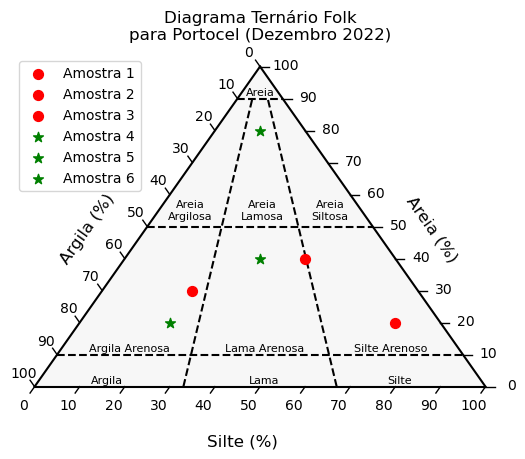

In [83]:
# Plotagem do ternário baseado em Folk (1954)

scale = 100
figure, tax = ternary.figure(scale=scale)
tax.set_title("Diagrama Ternário Folk\npara Portocel (Dezembro 2022)", fontsize=12, pad=20, ha='center', va='center') 

# Legendas
tax.left_axis_label("Argila (%)", fontsize=12, offset=0.14)
tax.right_axis_label("Areia (%)", fontsize=12, offset=0.14)
tax.bottom_axis_label("Silte (%)", fontsize=12, offset=0.14)

# Linhas e plots 
tax.plot(rot_list(linha_const(10)), color="black", linestyle="--", zorder=1)
tax.plot(rot_list(linha_const(50)), color="black", linestyle="--", zorder=1)
tax.plot(rot_list(linha_const(90)), color="black", linestyle="--", zorder=1)
tax.plot(lista1, color="black", linestyle="--", zorder=1)
tax.plot(lista2, color="black", linestyle="--", zorder=1)
tax.boundary(False)

tax.annotate("Areia",  regiao_areias,  ha="center", va="center", fontsize=8)
tax.annotate("Silte",  regiao_siltes,  ha="center", va="center", fontsize=8)
tax.annotate("Argila", regiao_argilas, ha="center", va="center", fontsize=8)
tax.annotate("Lama", regiao_lama, ha="center", va="center", fontsize=8)
tax.annotate("Argila Arenosa",  regiao_argilaArenosa,  ha="center", va="center", fontsize=8)
tax.annotate("Lama Arenosa",  regiao_lamaArenosa,  ha="center", va="center", fontsize=8)
tax.annotate("Silte Arenoso", regiao_silteArenoso, ha="center", va="center", fontsize=8)
tax.annotate("Areia\nArgilosa", regiao_areiaArgilosa, ha="center", va="center", fontsize=8)
tax.annotate("Areia\nLamosa", regiao_areiaLamosa, ha="center", va="center", fontsize=8)
tax.annotate("Areia\nSiltosa", regiao_areiaSiltosa, ha="center", va="center", fontsize=8)

# Plotando os pontos por cima do pontilhado (zorder)
for label, point in samples1.items():
    tax.scatter([point], marker='o', color='red', label=label, s=50, zorder=20)

for label, point in samples2.items():
    tax.scatter([point], marker='*', color='green', label=label, s=55, zorder=20)

tax.legend()

# Ajustando ticks: offset para afastar os números
tax.ticks(axis='l', multiple=10, linewidth=1, offset=0.02)
tax.ticks(axis='r', multiple=10, linewidth=1, offset=0.02)
tax.ticks(axis='b', multiple=10, linewidth=1, offset=0.02)

tax.clear_matplotlib_ticks()

# Remove a "caixa" externa do Matplotlib
for spine in figure.gca().spines.values():
    spine.set_visible(False)

# ATENÇÃO APARA SALVAR A FIGURA DESCOMENTE A LINHA ABAIXO E EDITE O CAMINHO E O NOME DO ARQUIVO

#plt.savefig("caminho\\nome_do_arquivo.png", dpi=300, bbox_inches="tight")

plt.show()